![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

# Insper Pós-Graduação
## Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/)

## JSON LAB

Experimentar (consumir) WEB services REST/JSON

In [ ]:
import pandas as pd
import json
from urllib.request import urlopen

# Um JSON clássico

**urllib** vs **requests**

- https://requests.readthedocs.io/en/latest/#
- https://docs.python.org/3/library/urllib.request.html

In [ ]:
url = 'https://api-imp.seade.gov.br/v1/localidade/50'

In [ ]:
# FIX hint at: https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
seade = json.loads(urlopen(url).read())

In [ ]:
seade

In [ ]:
import requests

In [ ]:
requests.get('https://api.duckduckgo.com/?format=json&pretty=1&q=Insper').json()

In [ ]:
url = 'https://corgis-edu.github.io/corgis/datasets/json/covid/covid.json'

In [ ]:
covid = json.loads(urlopen(url).read())

In [ ]:
covid[0]

# Lendo um JSON como um dataframe

In [ ]:
url = 'https://corgis-edu.github.io/corgis/datasets/json/covid/covid.json'

In [ ]:
covid_df = pd.read_json(url)

In [ ]:
covid_df

In [ ]:
url_seade =  'https://api-imp.seade.gov.br/v1/localidade/50'

In [ ]:
requests.get(url_seade).json()

In [ ]:
pd.read_json(url_seade).T

In [ ]:
covid_df.head(1)

In [ ]:
covid_date = pd.json_normalize(covid_df['Date'])

In [ ]:
covid_data = pd.json_normalize(covid_df['Data'])

In [ ]:
covid_location = pd.json_normalize(covid_df['Location'])

In [ ]:
covid_location.head()

In [ ]:
covid_df = pd.concat([covid_date, covid_data, covid_location], axis=1)

In [ ]:
covid_df.head(1)

In [ ]:
covid_df['Date'] = pd.to_datetime(covid_df[['Day', 'Month', 'Year']])

In [ ]:
covid_df.head(1)

In [ ]:
top10 = covid_df.groupby('Code')[['Cases']].sum().nlargest(10, 'Cases')

In [ ]:
top10 = top10.index

In [ ]:
top10

In [ ]:
covid_df[covid_df['Code'].isin(top10)]

In [ ]:
covid_top10 = covid_df.query('Code in @top10')

In [ ]:
covid_top10

In [ ]:
import altair as alt 

In [ ]:
alt.data_transformers.disable_max_rows()

In [ ]:
covid_top10 = covid_top10.sort_values(by=['Date', 'Code'])

In [ ]:
covid_top10.head()

In [ ]:
alt.Chart(covid_top10).mark_line().encode(
    x='Date:T',
    y='Cases:Q',
    color='Code:N',
    tooltip=['Code', 'Date', 'Cases']
).properties(
    width=800,
    height=500).interactive()

In [ ]:
#covid_top10.groupby(['Date', 'Code'])['Cases'].sum().groupby(level=1).cumsum().reset_index()['Cases'].values

In [ ]:
covid_top10['cumsum'] = covid_top10.groupby(['Date', 'Code'])['Cases'].sum(
).groupby(level=1).cumsum().reset_index()['Cases'].values

In [ ]:
covid_top10['cumsum'] = covid_top10.groupby(['Date', 'Code'])['Cases'].sum().groupby(level=1).cumsum().reset_index()['Cases'].values

In [ ]:
covid_top10

In [ ]:
covid_top10.query('Code == "BRA"')

In [ ]:
5554206 + 11843 == 5566049

In [ ]:
alt.Chart(covid_top10).mark_line().encode(
    x = 'Date:T',
    y = alt.Y('cumsum:Q', title='Casos acumulados'),
    color = 'Code:N',
    tooltip=['Date', 'Code', 'cumsum']
).properties(
    title = 'Infecções por COVID-19',
    width=800,
    height=500


).interactive()

In [ ]:
key = '174eee2f008949e1a6d242ebbb8e9f38'

In [ ]:
requests.get(f'https://api.covidactnow.org/v2/cbsas.json?apiKey={key}').json()

In [ ]:
covid_api = pd.read_json(f'https://api.covidactnow.org/v2/cbsas.json?apiKey={key}')

In [ ]:
covid_api.head()

In [ ]:
covid_api.query('country == "USA"')

In [ ]:
covid_metrics = pd.json_normalize(covid_api['metrics']) 

In [ ]:
covid_metrics

In [ ]:
covid_api.head()

In [ ]:
pd.json_normalize(requests.get(f'https://api.covidactnow.org/v2/cbsas.json?apiKey={key}').json()) 

### LAB

Há WEB API para TUDO neste mundo!!!

- https://docs.github.com/en/rest/repos?apiVersion=2022-11-28

1. Criar um notebook novo
2. Escolher uma WEB API
3. Obter os dados
4. Importar para o dataframe Pandas
5. Gerar visualização
6. Compartilhar com os colegas

Dica:

O que ocorre quando vc digita no campo de busca do browser?!

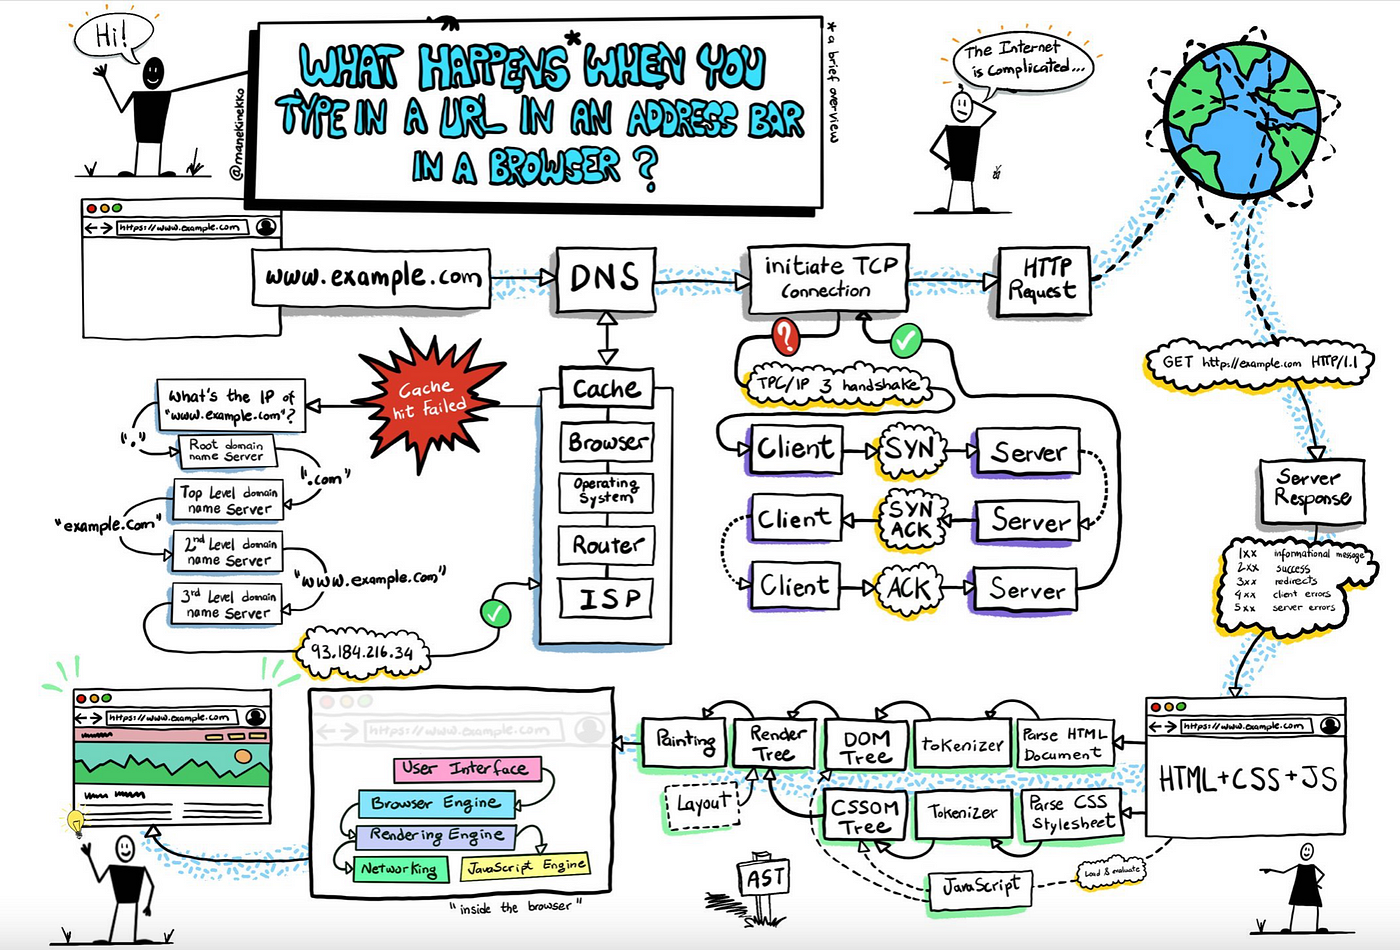